# Analysis - exp43

- Consistency check DQN parameters

('score', 'learning_rate', 'epsilon')

(0.9393386211726319, 0.000889, 0.1)

In [2]:
import os
import csv
import numpy as np
import torch as th

from glob import glob
from pprint import pprint

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set(font_scale=1.5)
sns.set_style('ticks')

matplotlib.rcParams.update({'font.size': 16})
matplotlib.rc('axes', titlesize=16)

from notebook_helpers import load_params
from notebook_helpers import load_monitored
from notebook_helpers import join_monitored
from notebook_helpers import score_summary

def load_data(path, run_index=(0, 20)):
    runs = range(run_index[0], run_index[1]+1)
    exps = []
    for r in runs:
        file = os.path.join(path, "run_{}_monitor.csv".format(int(r)))
        try:
            mon = load_monitored(file)
        except FileNotFoundError:
            mon = None
        exps.append(mon)
    return exps

# Load data

In [26]:
path = "/Users/qualia/Code/azad/data/wythoff/exp43/"
exp_43 = load_data(path, run_index=(1, 20))

In [27]:
print(len(exp_43))

20


In [29]:
pprint(exp_43[1].keys())
pprint(exp_43[1]['score'][:20])

dict_keys(['file', 'episode', 'loss', 'score'])
[0.24946075018459948,
 0.26355632488073205,
 0.28260794537891115,
 0.28848820812170695,
 0.29907051919743693,
 0.29907051919743693,
 0.3035350381834405,
 0.3078609075114937,
 0.31174932937940664,
 0.33013433283606053,
 0.33362321651920607,
 0.336889769379406,
 0.34298846797453597,
 0.34589559864721503,
 0.35408340338988703,
 0.36205768236038227,
 0.3670325556845669,
 0.3789048457714027,
 0.3856478151517381,
 0.3898993873652209]


# Plots

Timecourse

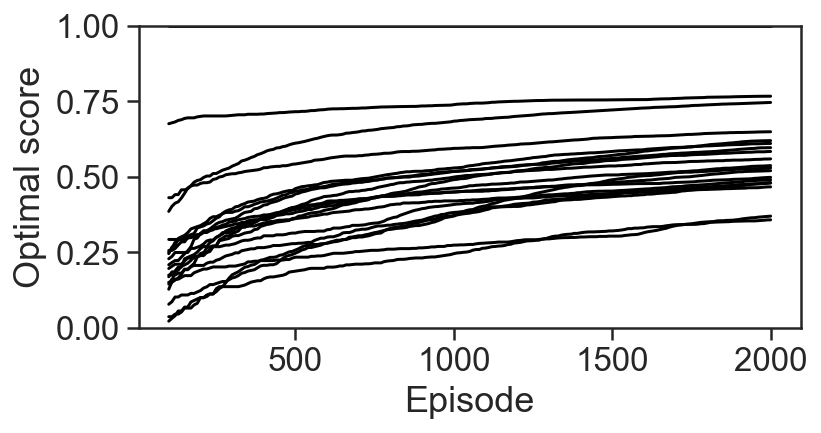

In [34]:
plt.figure(figsize=(6, 3))
for r, mon in enumerate(exp_43):
    if mon is not None:
        _ = plt.plot(mon['episode'], mon['score'], color='black')
        _ = plt.ylim(0, 1)
_ = plt.ylabel("Optimal score")
_ = plt.tight_layout()                                    
_ = plt.xlabel("Episode")

Histograms of final values

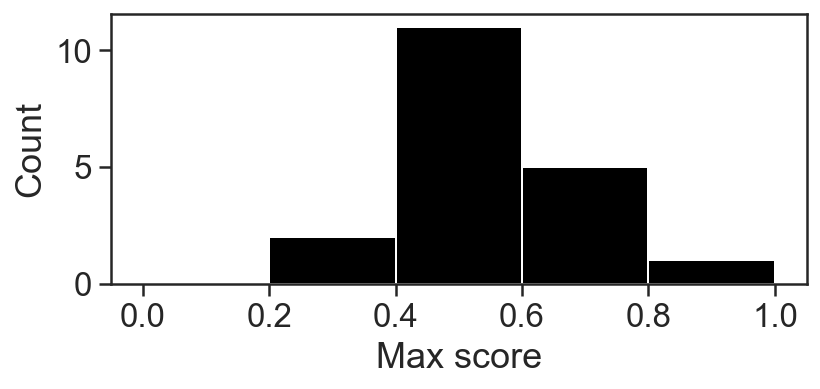

In [43]:
data = []
plt.figure(figsize=(6, 3))
for r, mon in enumerate(exp_43):
    if mon is not None:
        data.append(np.max(mon['score']))                

_ = plt.hist(data, bins=5, range=(0,1), color='black')
_ = plt.xlabel("Max score")
_ = plt.ylabel("Count")
_ = plt.tight_layout()      

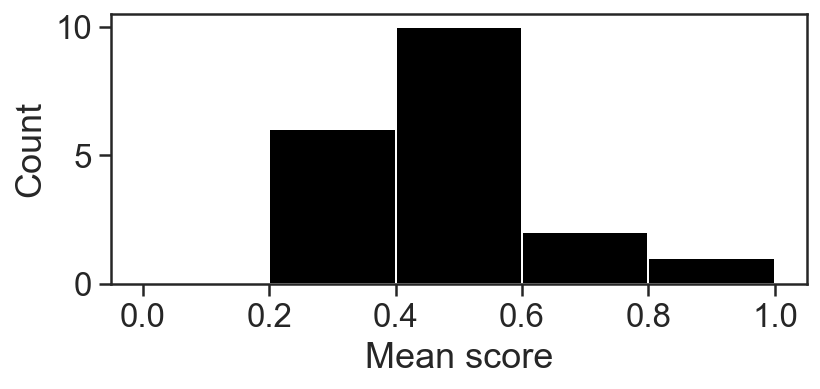

In [44]:
data = []
plt.figure(figsize=(6, 3))
for r, mon in enumerate(exp_43):
    if mon is not None:
        data.append(np.mean(mon['score']))                

_ = plt.hist(data, bins=5, range=(0,1), color='black')
_ = plt.xlabel("Mean score")
_ = plt.ylabel("Count")
_ = plt.tight_layout()                                    